In [3]:
import tensorflow as tf
import os

# Keras data preperation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load checkpoint model
from tensorflow.keras.models import load_model

# Import Dice and IoU loss
from src.evaluation.metrics import dice_coefficient, iou_coefficient

import matplotlib.pyplot as plt
import numpy as np

2024-07-04 22:48:00.158586: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 22:48:00.158681: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 22:48:00.161288: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-04 22:48:02.116265: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
class CFG:
    batch_size = 5
    seed = 123
    target_size = (256, 256)
    valid_dir = './valid/'

In [5]:
valid_data_generator = ImageDataGenerator(rescale=1/255)

valid_images_generator = valid_data_generator.flow_from_directory(
    directory=CFG.valid_dir + 'images',
    target_size=CFG.target_size,
    batch_size=CFG.batch_size,
    class_mode=None,
    shuffle=False,
    seed=CFG.seed
)

valid_masks_generator = valid_data_generator.flow_from_directory(
    directory=CFG.valid_dir + 'masks',
    target_size=CFG.target_size,
    batch_size=CFG.batch_size,
    color_mode = 'grayscale',
    class_mode=None,
    shuffle=False,
    seed=CFG.seed
)

valid_generator = zip(valid_images_generator, valid_masks_generator)

Found 200 images belonging to 1 classes.
Found 200 images belonging to 1 classes.


In [6]:
checkpoint_path = './model_checkpoints/smaller_u_net.h5'

if os.path.exists(checkpoint_path):
    model = load_model(checkpoint_path, custom_objects={
        'dice_coefficient': dice_coefficient,
        'iou_coefficient': iou_coefficient
    })
    print("Model loaded successfully from checkpoint.")
else:
    print(f"Error: Checkpoint file '{checkpoint_path}' not found. Model not loaded.")

2024-07-04 22:48:16.254214: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-04 22:48:16.305903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-04 22:48:16.305955: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-04 22:48:16.308885: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-04 22:48:16.308941: I tensorflow/compile

Model loaded successfully from checkpoint.


In [7]:
batch = next(valid_generator)
input_images, true_masks = batch

predictions = model.predict(input_images)

2024-07-04 22:48:21.677001: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-07-04 22:48:22.325836: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-04 22:48:23.006718: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.20GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-07-04 22:48:23.312412: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-07-04 22:48:24.216366: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate

1/1 [==============================] - 5s 5s/step


2024-07-04 22:48:26.126063: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [23]:
def visualize_segmentation(input_images, true_masks, predicted_masks):
    """
    Visualize the input images, true masks, and predicted masks side by side.
    
    Args:
    input_images (numpy.ndarray): The input images (batch_size, height, width, channels)
    true_masks (numpy.ndarray): The true masks (batch_size, height, width)
    predicted_masks (numpy.ndarray): The predicted masks (batch_size, height, width)
    figsize (tuple): Figure size
    """

    _, axs = plt.subplots(CFG.batch_size, 3, figsize=(10, 20))

    for i in range(CFG.batch_size):
        # Display input image
        axs[i, 0].imshow(input_images[i])
        axs[i, 0].set_title('Input Image')
        axs[i, 0].axis('off')
        
        # Display true mask
        axs[i, 1].imshow(true_masks[i], cmap='gray')
        axs[i, 1].set_title('True Mask')
        axs[i, 1].axis('off')
        
        # Display predicted mask
        axs[i, 2].imshow(predicted_masks[i], cmap='gray')
        axs[i, 2].set_title('Predicted Mask')
        axs[i, 2].axis('off')

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    
    plt.show()

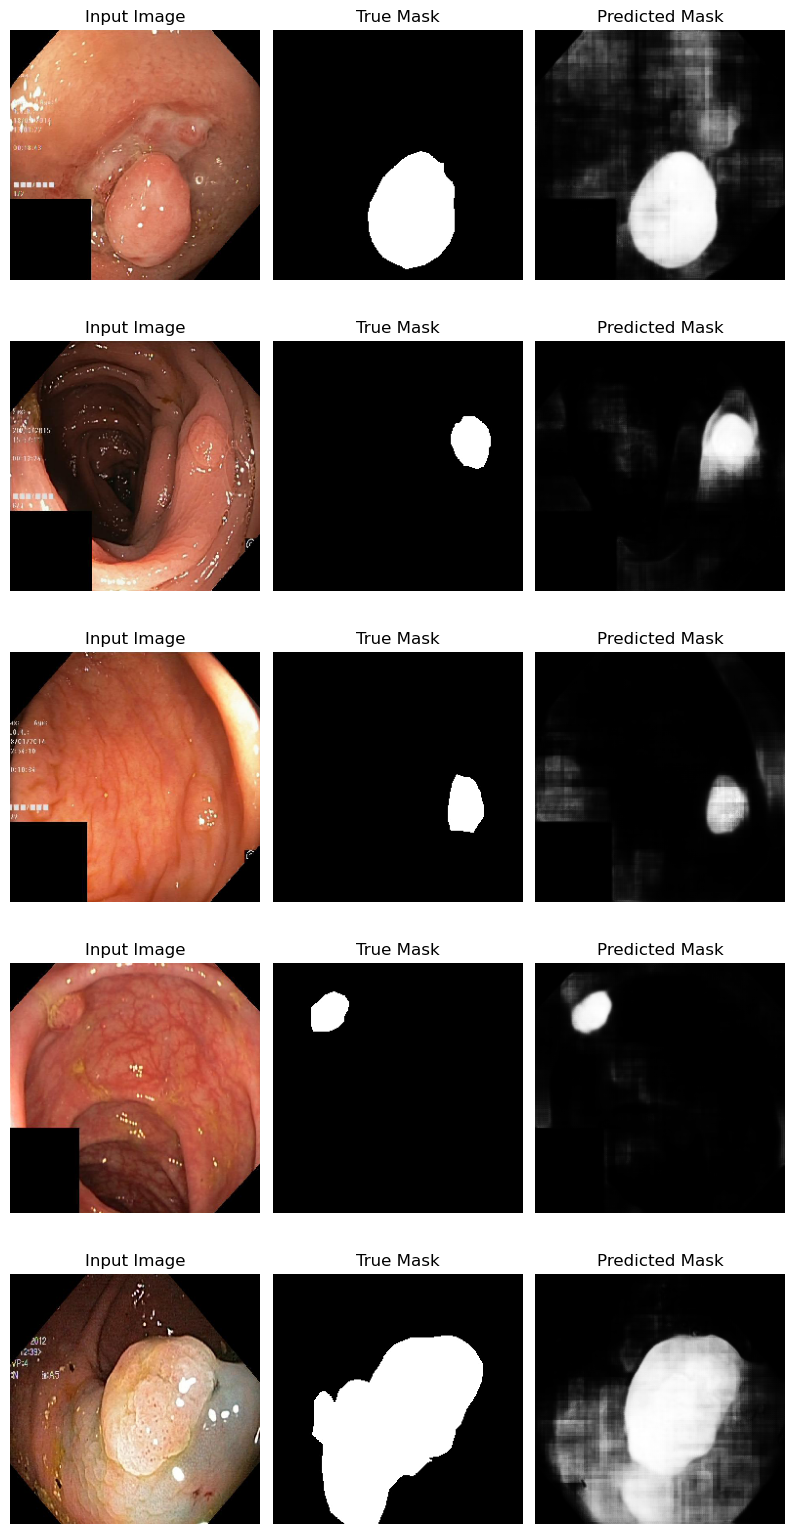

In [24]:
visualize_segmentation(input_images, true_masks, predictions)